<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[9차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ 이미지 변환 방법에 대해 학습한다.<br>
   - 확대 / 축소, 이동, 회전, 기울림, 대칭, 원근 변환, 원근 보정
        
○ 이미지 증식 방법에 대해 학습한다.        
</font></td></tr>   
</table>        

# 이미지 변환

## 변환의 종류
 
  - 강체 변환(Ridid-Body transformation) : 이동, 회전
  - 유사 변환(Similarity Transformations) : 강체 변환 후 크기 변환
  - 선형 변환(Linear Transformation)
  - 원근변환(Projective Transformation)
  
  - Affine Transformations : (강체변환 + 유사변환) + 선형 변환 - 이동, 회전, 크기, 기울림, 반전 변환 

<figure>
       <img src="./lecture_image/09_affine_transform.png" width=40%>
    <center><figcaption><font size=1>참고 : 위키백과</font></figcaption></center>   
</figure>  
 

## 이미지 확대

- <font color=red>cv2.resize(src, (w, h), interpolation)</font> 
  - src를 w, h 만큼 크기로 변환
  
  
- interpolation : 보간법 (이미지 변환시 깨지는 부분을 보간)
  - cv2.INTER_NEAREST : 최근방 이웃 보간법 - 빠르지만 화질이 떨어짐, 잘 쓰이지 않음
  - cv2.INTER_LINEAR : 양선형 보간법 (2x2 이웃 픽셀 참조) - 효율이 가장 좋음, 속도도 빠르고 화질도 우수
  - cv2.INTER_CUBIC : 3차 회선 보간법 (4x4 이웃 픽셀 참조) - NTER_LINEAR보다 느리지만 화질이 더 우수
  - cv2.INTER_LANCZOS4 : Lanczos 보간법 (8x6 이웃 픽셀 참조) - 속도가 느리지만 화질이 더 우수
  - cv2.INTER_AREA : 영역적인 정보를 추출해서 결과 영상을 셋팅 - 영상 축소시 효과적인 방법 

(50, 52, 3)


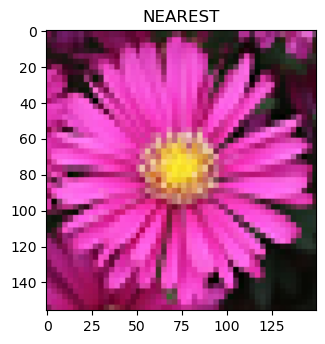

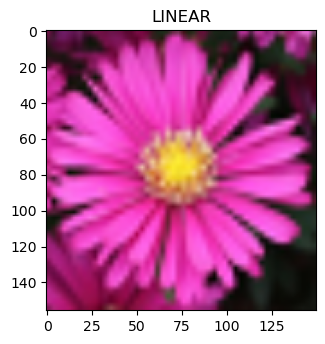

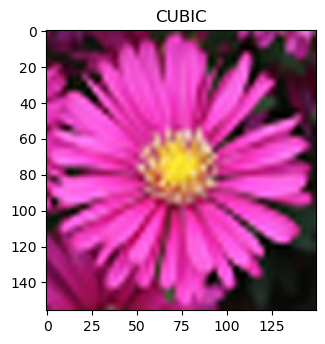

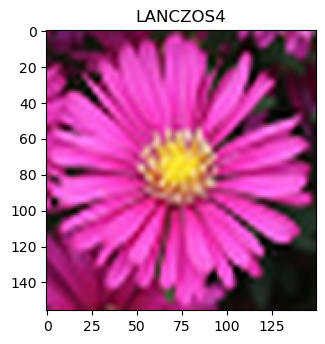

In [10]:
# 실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/flower1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

h, w, c = img.shape

result1 = cv2.resize(img, (h*3, w*3), interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title("NEAREST")
plt.imshow(result1)

result2 = cv2.resize(img, (h*3, w*3), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(10,8))
plt.subplot(2,2,2)
plt.title("LINEAR")
plt.imshow(result2)

result3 = cv2.resize(img, (h*3, w*3), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10,8))
plt.subplot(2,2,3)
plt.title("CUBIC")
plt.imshow(result3)

result4 = cv2.resize(img, (h*3, w*3), interpolation=cv2.INTER_LANCZOS4)

plt.figure(figsize=(10,8))
plt.subplot(2,2,4)
plt.title("LANCZOS4")
plt.imshow(result4)

## 이미지 축소

- 이미지 축소 시 한 픽셀로 구성된 성분은 사라지게 되는 경우가 발생
  - 입력 영상을 부드럽게 필터링한 후에 축소를 하거나 여러번 축소를 반복 (cv2.INTER_AREA)

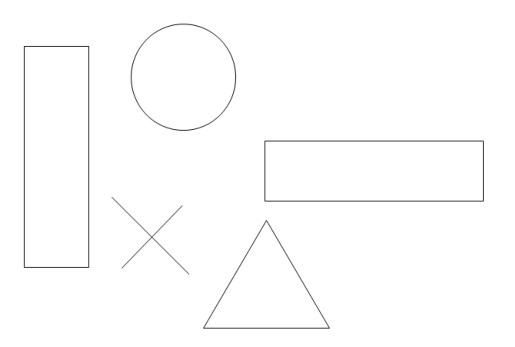

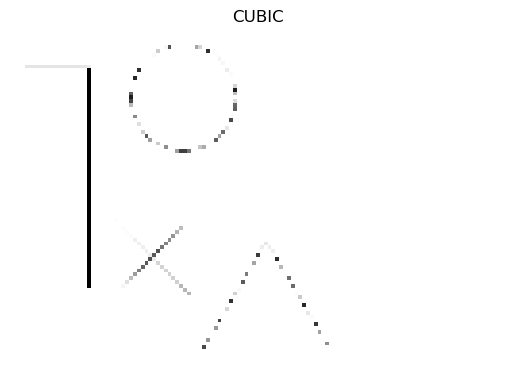

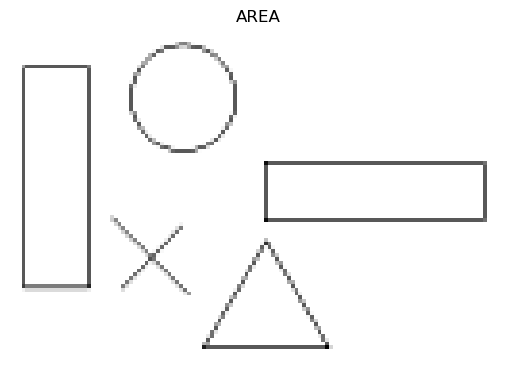

In [18]:
# 실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("images/shape.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()
h,w = img.shape

result1 = cv2.resize(img,(int(w*0.2),int(h*0.2)), interpolation=cv2.INTER_CUBIC)

plt.imshow(result1, cmap="gray")
plt.title("CUBIC")
plt.axis("off")
plt.show()

result2 = cv2.resize(img,(int(w*0.2),int(h*0.2)), interpolation=cv2.INTER_AREA)

plt.imshow(result2, cmap="gray")
plt.title("AREA")
plt.axis("off")
plt.show()

## 이미지 이동

- <font color=red>cv2.warpAffine(img, M, (w, h), dst, flags, borderValue)</font>
  - M : 행렬에 따른 affine 변환을 수행
  - (w, h) : 출력 이미지의 크기 
  - dst : 출력 영상에 대한 옵션
  - flags : 보간법 (cv2.INTER_LINEAR 등)
  - borderValue : 이동 후 빈공간 채우는 방식 (0 (검정색), cv2.BORDER_REFLECT(반사)

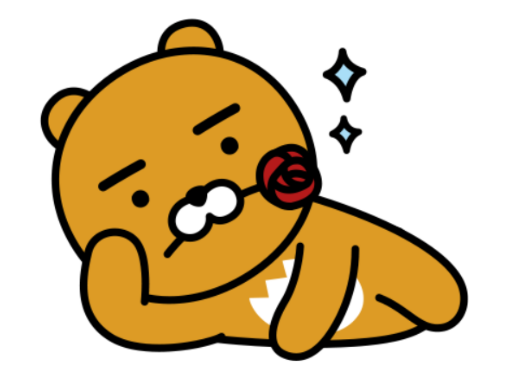

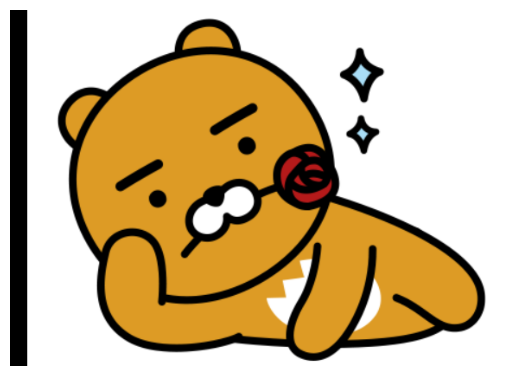

In [25]:
# 실습
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/che.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                

plt.imshow(img)
plt.axis("off")
plt.show()

h, w, c = img.shape

# 어핀 행렬 (이동)
# 오른쪽을 20만큼 이동
M1 = np.float32([[1, 0, 20],
                 [0, 1, 0]])
# 왼쪽으로 20만큼 이동
M2 = np.float32([[1, 0, -20],
                 [0, 1, 0]])
# 아래쪽으로 20만큼 이동
M3 = np.float32([[1, 0, 0],
                 [0, 1, 20]])
# 위쪽으로 20만큼 이동
M4 = np.float32([[1, 0, 0],
                 [0, 1, -20]])
# 오른쪽을 20, 위쪽으로 20만큼 이동
M5 = np.float32([[1, 0, 20],
                 [0, 1, -20]])

result = cv2.warpAffine(img, M1, (w, h), None, 
                        cv2.INTER_LINEAR, 0)

plt.imshow(result)
plt.axis("off")
plt.show()

## 이미지 회전

- <font color=red>cv2.getRotationMatrix2D(회전중심점, 각도, 확대비율)</font>

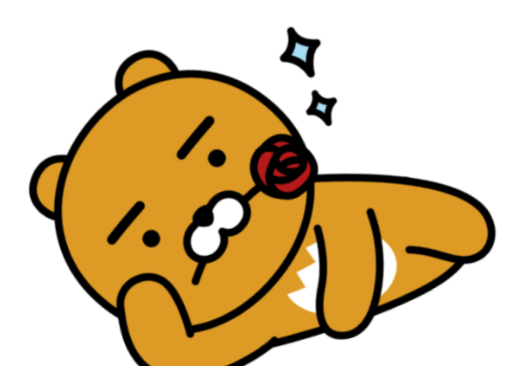

In [26]:
# 실습
M6 = cv2.getRotationMatrix2D((w /2, h/2), 20, 1)

result = cv2.warpAffine(img, M6, (w,h), None,
                       cv2.INTER_LINEAR,1)
plt.imshow(result)
plt.axis("off")
plt.show()

## 이미지 기울림

<img src="./lecture_image/09_affine_transform2.png" width=40%>

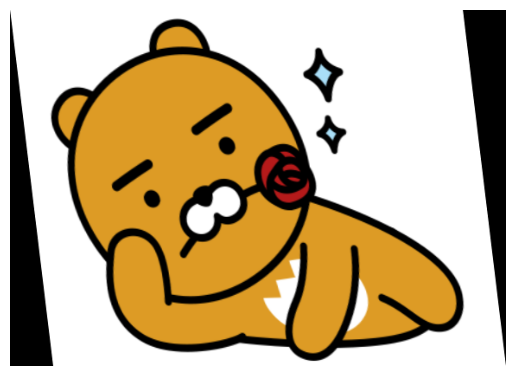

In [27]:
# 실습
# 이전 좌표
pts1 = np.float32([[0,0],[w,0],[0,h]])
pts2 = np.float32([[0,0],[w-50,0],[50,h]])

M7 = cv2.getAffineTransform(pts1,pts2)

result = cv2.warpAffine(img, M7, (w,h))

plt.imshow(result)
plt.axis("off")
plt.show()

## 이미지 대칭

- <font color=red>cv2.flip(img, flipCode)</font>
  - flipCode : 대칭 방법
    - flipCode < 0 : 대각 대칭 
    - flipCode = 0 : 상하 대칭
    - flipCode > 0 : 좌우 대칭

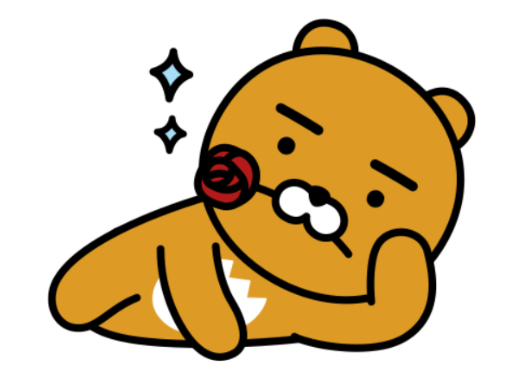

In [30]:
# 실습

result = cv2.flip(img, flipCode=1)

plt.imshow(result)
plt.axis("off")
plt.show()

## 원근 변환

- Affine 변환과는 달리 4개 점을 이용하여 이미지를 변환


- <font color=red>M = cv2.getPerspectiveTransform(pts1, pts2)</font>
  - pts1 좌표를 pts2 좌표로 원근 변환 설정


- <font color=red>result = cv2.warpPerspective(img, M, (w, h))</font>
  - 이미지, 변환값, 이미지 크기로 원근 변환 실행
  - (w, h) : 출력 이미지 크기

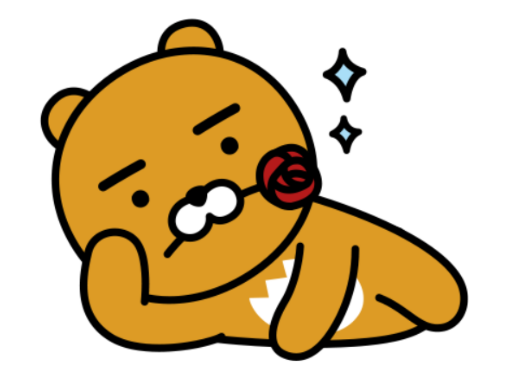

In [31]:
# 실습
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/che.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                

plt.imshow(img)
plt.axis("off")
plt.show()

(-0.5, 573.5, 411.5, -0.5)

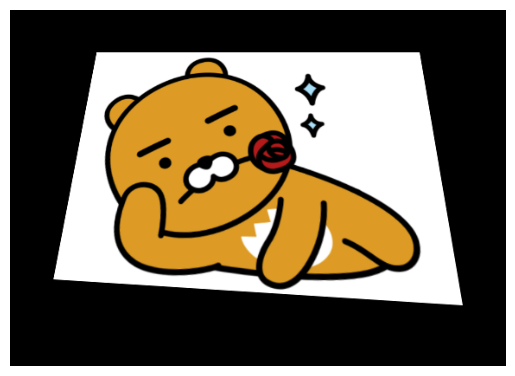

In [35]:
h, w, c = img.shape

# 원근 변환 전의 좌표와 변환 후의 좌표 설정
pts1 = np.float32([[0,0],[w,0],[0,h],[w,h]])
# 원래의 크기보다 크거나 음수가 나오지 않게 설정
pts2 = np.float32([[100,50],[w-100,50],[50,h-100],[w-50,h-70]])

# 변환 행렬
M8 = cv2.getPerspectiveTransform(pts1, pts2)

# 원근변환
result = cv2.warpPerspective(img,M8,(w,h))

plt.imshow(result)
plt.axis("off")

## 원근 보정

- 원근 변환을 이용하여 기울어진 이미지를 보정하는 방법

<img src="./lecture_image/09_perspective.png" width=50%>

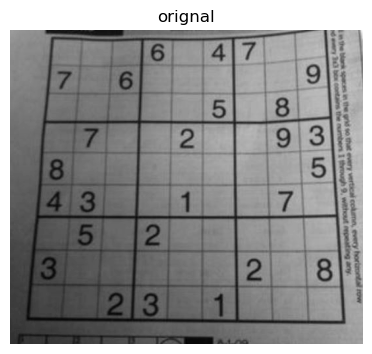

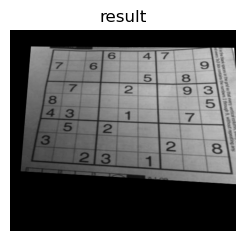

In [40]:
# 실습
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/hough.png" , cv2.IMREAD_GRAYSCALE)

h, w = img.shape

pts1 = np.float32([[61,15],[476,10],[25,440],[505,445]])
plt2 = np.float32([[0,0],[w,0],[0,h,],[w,h]])

M = cv2.getPerspectiveTransform(pts1, pts2)

result = cv2.warpPerspective(img,M,(w,h))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("orignal")
plt.axis("off")
plt.show()
plt.subplot(1,2,1)
plt.imshow(result, cmap='gray')
plt.title("result")
plt.axis("off")
plt.show()

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다음과 같이 원본 이미지를 원근보정하기</font></td></tr> 
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;">
        <img src="./lecture_image/09_perspective_transform.png" width=80%></td></tr>   
</table>

(-0.5, 599.5, 398.5, -0.5)

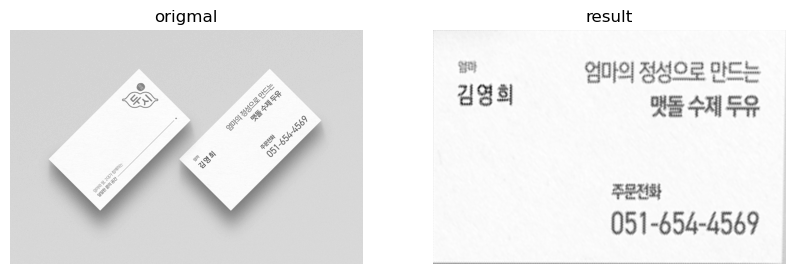

In [48]:
# 실습
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("./images/nametag.png", cv2.IMREAD_GRAYSCALE)

h, w = img.shape

pts1 = np.float32([[287, 220],[441, 67],[376, 308],[531, 153]])
pts2 = np.float32([[0, 0],[w, 0],[0, h],[w, h]])


M = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img, M, (w, h))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = "gray")
plt.title("origmal")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(result, cmap = "gray")
plt.title("result")
plt.axis("off")

# 이미지 증식하기

- Image augmentation : 훈련 데이터가 적은 경우 훈련 데이터를 늘리는 방식

In [50]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np

input_dir = "./images/augmentation/"
output_dir = "./images/output/"

if not os.path.exists(input_dir) :
    os.mkdir(input_dir)

if not os.path.exists(output_dir) :
    os.mkdir(output_dir)    

# 이미지 불러오기
file_list = os.listdir(input_dir)

# 증식 횟수
epoch = 2

for file in file_list :
    img = cv2.imread(input_dir + file)
    
    file_name = file.split(".")[0]
    
    h, w, ch = img.shape
    
    # 이미지 증식
    for i in range(epoch) :
        # 이미지 확대 / 축소 값 선택
        param = random.uniform(0, 3)        

        # 확대
        if param >= 1.0 :
            img2 = cv2.resize(img, (int(w * param), int(h * param)), 
                     interpolation = cv2.INTER_CUBIC)
        # 축소    
        else :
            img2 = cv2.resize(img, (int(w * param), int(h * param)), 
                     interpolation = cv2.INTER_AREA)
            
        # 이미지 좌우 이동 선택
        param1 = random.randint(0, 1)
        # 이동 값
        param2 = random.randint(-10, 10)
        h, w, ch = img2.shape
        
        if param1 == 0 :   # 왼쪽 이동
            M = np.float32([[1, 0, param2],
                            [0, 1, 0]])
            img3 = cv2.warpAffine(img2, M, (w, h), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT)
        else :  # 오른쪽 이동
            M = np.float32([[1, 0, param2],
                            [0, 1, 0]])
            img3 = cv2.warpAffine(img2, M, (w, h), None, cv2.INTER_LINEAR, 
                                  cv2.BORDER_REFLECT)
            
        # 회전값
        param3 = random.randint(-20, 20)
        h, w, ch = img3.shape
        
       
        M = cv2.getRotationMatrix2D((w / 2, h / 2), param3, 1)
        img4 = cv2.warpAffine(img3, M, (w, h), None, cv2.INTER_LINEAR, 
                              cv2.BORDER_REFLECT)


        # 증식 이미지 저장
        cv2.imwrite(output_dir + "{}_{}.png".format(file_name, i), img4, 
                    params=[cv2.IMWRITE_PNG_COMPRESSION, 0])    

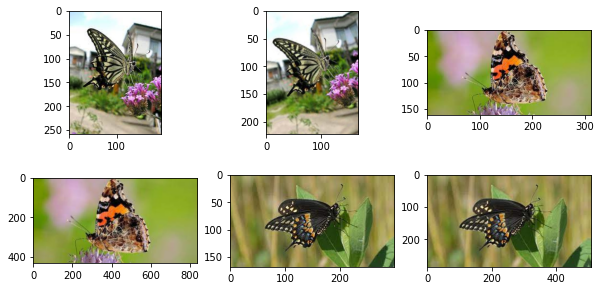

In [126]:
# 실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=3>○ 다른 변환을 추가하여 이미지 증식을 수행해보자</font></td></tr>    
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[9차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>

○ 변환의 종류
  - 강체 변환(Ridid-Body transformation) : 이동, 회전
  - 유사 변환(Similarity Transformations) : 강체 변환 후 크기 변환
  - 선형 변환(Linear Transformation)
  - 원근변환(Projective Transformation)
  - Affine Transformations : (강체변환 + 유사변환) + 선형 변환 - 이동, 회전, 크기, 기울림, 반전 변환

○ 이미지 확대 : <font color=red>cv2.resize(src, (w, h), interpolation)</font> 

○ 이미지 축소 :  보간법으로 cv2.INTER_AREA를 사용

○ 이미지 이동 : <font color=red>cv2.warpAffine(img, M, (w, h), dst, flags, borderValue)</font> 

○ 이미지 회전 : <font color=red>cv2.getRotationMatrix2D(회전중심점, 각도, 확대비율)</font> 

○ 이미지 대칭 : <font color=red>cv2.flip(img, flipCode)</font> 

○ 원근변환 : <font color=red>cv2.warpPerspective(img, M, (w, h))</font> 

○ Image augmentation : 훈련 데이터가 적은 경우 훈련 데이터를 늘리는 방식           
</font></td></tr>   
</table>
